In [186]:
# ✅ Set your Expected Parrot API Key
import os

os.environ["EXPECTED_PARROT_API_KEY"] = 'JgQAXppsbPJWOn4Vvx2IQVkDywySRiWGJmZGNtrOVVc'

In [187]:
from edsl import Agent

tech_executive = Agent(
    name="Sarah Chen",
    traits={
        "persona": (
            "A 38-year-old tech executive who manages finances through apps "
            "but visits branches for mortgages. Values efficiency and expertise, "
            "frustrated by waits and paperwork. Expects seamless experiences."
        )
    }
)

baby_boomer = Agent(
    name="Robert Davis",
    traits={
        "persona": (
            "A 68-year-old retiree who values trust, human interaction, and conservative deposit strategies. "
            "Prefers quiet, in-person consultations for estate planning and finds noisy or tech-heavy branches frustrating."
        )
    }
)

millennial_freelancer = Agent(
    name="Jasmine Ali",
    traits={
        "persona": (
            "A 29-year-old freelance designer who prefers mobile-first banking. "
            "Values speed, low fees, and integrated financial coaching in apps. "
            "Skeptical of branches unless there's a clear value-add like planning sessions or events."
        )
    }
)

small_business_owner = Agent(
    name="Carlos Ramirez",
    traits={
        "persona": (
            "A 45-year-old café owner who manages business accounts at the branch. "
            "Wants fast lending decisions, payroll support, and values flexible hours. "
            "Appreciates dedicated relationship managers and local ties."
        )
    }
)

gig_worker = Agent(
    name="Tina Oduro",
    traits={
        "persona": (
            "A 34-year-old rideshare driver using prepaid debit cards and side gigs. "
            "Wants to avoid fees, struggles with credit approval, and feels overlooked by banks. "
            "Interested in stability but distrusts the system."
        )
    }
)

global_nomad = Agent(
    name="Lena Zhou",
    traits={
        "persona": (
            "A 27-year-old digital nomad and video freelancer. Lives across borders, relies on multi-currency accounts, "
            "needs mobile-first tools and 24/7 service. Frustrated by banks that don’t support international lifestyles. "
            "Aspires to build wealth, but feels excluded from traditional products."
        )
    }
)

In [145]:
personas = [tech_executive, baby_boomer, millennial_freelancer, small_business_owner, gig_worker, global_nomad]
[x.name for x in personas]

['Sarah Chen',
 'Robert Davis',
 'Jasmine Ali',
 'Carlos Ramirez',
 'Tina Oduro',
 'Lena Zhou']

In [146]:
from edsl import Scenario

wellness_center = Scenario({
    "concept_name": "Financial Wellness Center",
    "description": (
        "Advisory-focused branches with consultation rooms, AI planning tools, "
        "workshop spaces, scheduled appointments, and wealth education. Reduced tellers."
    )
})

ai_tellers = Scenario({
    "concept_name": "AI-Powered Bank Tellers",
    "description": (
        "Video teller pods with remote specialists, instant loan kiosks, and tech support bars "
        "for routine transactions. Faster service, fewer on-site tellers."
    )
})

community_hub = Scenario({
    "concept_name": "Community Hub",
    "description": (
        "Branches redesigned as local hubs: co-working spaces, small business incubator rooms, "
        "and a high-quality coffee bar to encourage visits. Emphasis on community events."
    )
})

In [204]:
from edsl import QuestionFreeText, Survey, Model

# Define your question
q = QuestionFreeText(
    question_name="reaction",
    question_text="What's your reaction to this branch concept: {{ scenario.description }}?"
)

# Build the survey
survey = Survey([q])

# Load the model
model = Model("gpt-4o")

# Run the survey for all personas across all 3 scenarios
results = (
    survey
    .by(personas)            # your 6 personas
    .by([wellness_center, ai_tellers, community_hub])  # the 3 branch concepts
    .by(model)
    .run()
)

# View response table
results.select("agent.agent_name", "agent.persona", "answer.reaction")

,agent.agent_name,agent.persona,answer.reaction
0,Sarah Chen,"A 38-year-old tech executive who manages finances through apps but visits branches for mortgages. Values efficiency and expertise, frustrated by waits and paperwork. Expects seamless experiences.","That concept sounds like a step in the right direction for modern banking. As someone who values efficiency and expertise, I appreciate the emphasis on advisory services and the use of AI planning tools. Having consultation rooms and scheduled appointments would definitely help reduce the frustration of waiting and streamline the process. The addition of workshop spaces and wealth education is a great way to enhance customer knowledge and engagement. Reducing the number of tellers makes sense if the focus is on providing more specialized, value-added services. Overall, it aligns well with the seamless experience I expect from financial institutions."
1,Sarah Chen,"A 38-year-old tech executive who manages finances through apps but visits branches for mortgages. Values efficiency and expertise, frustrated by waits and paperwork. Expects seamless experiences.","I think the concept sounds promising and aligns well with my expectations for efficiency and expertise. Video teller pods with remote specialists could be a great way to get quick answers and personalized service without the usual wait times. Instant loan kiosks would be fantastic, especially if they streamline the process for smaller loans or credit inquiries. Tech support bars for routine transactions could help resolve issues swiftly, which is a big plus for someone who values time as much as I do. However, I would want to ensure that these systems are truly seamless. My frustration often stems from technical glitches or cumbersome paperwork, so I’d hope the technology is robust and user-friendly. Additionally, for more complex transactions like mortgages, I still value the face-to-face interaction and expertise of a specialist, so I’d want to know that option remains available. Overall, if executed well, this could significantly enhance the banking experience."
2,Sarah Chen,"A 38-year-old tech executive who manages finances through apps but visits branches for mortgages. Values efficiency and expertise, frustrated by waits and paperwork. Expects seamless experiences.","I find the concept quite intriguing. As someone who values efficiency and expertise, I appreciate the idea of transforming branches into multifunctional spaces. Having co-working spaces and incubator rooms could make banking visits more productive, especially if you need to handle multiple tasks in one trip. The addition of a high-quality coffee bar is a nice touch, making the environment more inviting and comfortable. However, the success of this concept would heavily depend on how seamlessly these services are integrated. If I’m visiting for something specific, like a mortgage, I’d still expect that process to be efficient and straightforward, without unnecessary waits or paperwork. The community events aspect is appealing too, as it could foster a sense of connection and support for local businesses. Overall, if executed well, this could redefine the banking experience in a positive way."
3,Robert Davis,"A 68-year-old retiree who values trust, human interaction, and conservative deposit strategies. Prefers quiet, in-person consultations for estate planning and finds noisy or tech-heavy branches frustrating.","Well, that sounds like quite the modern twist on banking! As someone who values trust and human interaction, I appreciate the idea of advisory-focused branches with consultation rooms. It gives people like me a chance to sit down face-to-face with a real person, which is so important for building trust, especially when it comes to something as personal as estate planning. AI planning tools and wealth education workshops could be beneficial, as long as they're easy to understand and not too tech-heavy. I prefer things to be straightforward an

In [205]:
results = results.mutate("concept = scenario.description")

results.select("concept", "agent.agent_name", "answer.reaction")

,answer.concept,agent.agent_name,answer.reaction
0,"Advisory-focused branches with consultation rooms, AI planning tools, workshop spaces, scheduled appointments, and wealth education. Reduced tellers.",Sarah Chen,"That concept sounds like a step in the right direction for modern banking. As someone who values efficiency and expertise, I appreciate the emphasis on advisory services and the use of AI planning tools. Having consultation rooms and scheduled appointments would definitely help reduce the frustration of waiting and streamline the process. The addition of workshop spaces and wealth education is a great way to enhance customer knowledge and engagement. Reducing the number of tellers makes sense if the focus is on providing more specialized, value-added services. Overall, it aligns well with the seamless experience I expect from financial institutions."
1,"Video teller pods with remote specialists, instant loan kiosks, and tech support bars for routine transactions. Faster service, fewer on-site tellers.",Sarah Chen,"I think the concept sounds promising and aligns well with my expectations for efficiency and expertise. Video teller pods with remote specialists could be a great way to get quick answers and personalized service without the usual wait times. Instant loan kiosks would be fantastic, especially if they streamline the process for smaller loans or credit inquiries. Tech support bars for routine transactions could help resolve issues swiftly, which is a big plus for someone who values time as much as I do. However, I would want to ensure that these systems are truly seamless. My frustration often stems from technical glitches or cumbersome paperwork, so I’d hope the technology is robust and user-friendly. Additionally, for more complex transactions like mortgages, I still value the face-to-face interaction and expertise of a specialist, so I’d want to know that option remains available. Overall, if executed well, this could significantly enhance the banking experience."
2,"Branches redesigned as local hubs: co-working spaces, small business incubator rooms, and a high-quality coffee bar to encourage visits. Emphasis on community events.",Sarah Chen,"I find the concept quite intriguing. As someone who values efficiency and expertise, I appreciate the idea of transforming branches into multifunctional spaces. Having co-working spaces and incubator rooms could make banking visits more productive, especially if you need to handle multiple tasks in one trip. The addition of a high-quality coffee bar is a nice touch, making the environment more inviting and comfortable. However, the success of this concept would heavily depend on how seamlessly these services are integrated. If I’m visiting for something specific, like a mortgage, I’d still expect that process to be efficient and straightforward, without unnecessary waits or paperwork. The community events aspect is appealing too, as it could foster a sense of connection and support for local businesses. Overall, if executed well, this could redefine the banking experience in a positive way."
3,"Advisory-focused branches with consultation rooms, AI planning tools, workshop spaces, scheduled appointments, and wealth education. Reduced tellers.",Robert Davis,"Well, that sounds like quite the modern twist on banking! As someone who values trust and human interaction, I appreciate the idea of advisory-focused branches with consultation rooms. It gives people like me a chance to sit down face-to-face with a real person, which is so important for building trust, especially when it comes to something as personal as estate planning. AI planning tools and wealth education workshops could be beneficial, as long as they're easy to understand and not too tech-heavy. I prefer things to be straightforward and not overly reliant on technology, which can sometimes be a bit overwhelming. Scheduled appointments are a great idea, as they ensure that everyone gets the attention they nee

In [206]:
results = results.mutate("concept = scenario.description")
results.select("concept", "agent.agent_name", "answer.reaction")

,answer.concept,agent.agent_name,answer.reaction
0,"Advisory-focused branches with consultation rooms, AI planning tools, workshop spaces, scheduled appointments, and wealth education. Reduced tellers.",Sarah Chen,"That concept sounds like a step in the right direction for modern banking. As someone who values efficiency and expertise, I appreciate the emphasis on advisory services and the use of AI planning tools. Having consultation rooms and scheduled appointments would definitely help reduce the frustration of waiting and streamline the process. The addition of workshop spaces and wealth education is a great way to enhance customer knowledge and engagement. Reducing the number of tellers makes sense if the focus is on providing more specialized, value-added services. Overall, it aligns well with the seamless experience I expect from financial institutions."
1,"Video teller pods with remote specialists, instant loan kiosks, and tech support bars for routine transactions. Faster service, fewer on-site tellers.",Sarah Chen,"I think the concept sounds promising and aligns well with my expectations for efficiency and expertise. Video teller pods with remote specialists could be a great way to get quick answers and personalized service without the usual wait times. Instant loan kiosks would be fantastic, especially if they streamline the process for smaller loans or credit inquiries. Tech support bars for routine transactions could help resolve issues swiftly, which is a big plus for someone who values time as much as I do. However, I would want to ensure that these systems are truly seamless. My frustration often stems from technical glitches or cumbersome paperwork, so I’d hope the technology is robust and user-friendly. Additionally, for more complex transactions like mortgages, I still value the face-to-face interaction and expertise of a specialist, so I’d want to know that option remains available. Overall, if executed well, this could significantly enhance the banking experience."
2,"Branches redesigned as local hubs: co-working spaces, small business incubator rooms, and a high-quality coffee bar to encourage visits. Emphasis on community events.",Sarah Chen,"I find the concept quite intriguing. As someone who values efficiency and expertise, I appreciate the idea of transforming branches into multifunctional spaces. Having co-working spaces and incubator rooms could make banking visits more productive, especially if you need to handle multiple tasks in one trip. The addition of a high-quality coffee bar is a nice touch, making the environment more inviting and comfortable. However, the success of this concept would heavily depend on how seamlessly these services are integrated. If I’m visiting for something specific, like a mortgage, I’d still expect that process to be efficient and straightforward, without unnecessary waits or paperwork. The community events aspect is appealing too, as it could foster a sense of connection and support for local businesses. Overall, if executed well, this could redefine the banking experience in a positive way."
3,"Advisory-focused branches with consultation rooms, AI planning tools, workshop spaces, scheduled appointments, and wealth education. Reduced tellers.",Robert Davis,"Well, that sounds like quite the modern twist on banking! As someone who values trust and human interaction, I appreciate the idea of advisory-focused branches with consultation rooms. It gives people like me a chance to sit down face-to-face with a real person, which is so important for building trust, especially when it comes to something as personal as estate planning. AI planning tools and wealth education workshops could be beneficial, as long as they're easy to understand and not too tech-heavy. I prefer things to be straightforward and not overly reliant on technology, which can sometimes be a bit overwhelming. Scheduled appointments are a great idea, as they ensure that everyone gets the attention they nee

In [207]:
from edsl import QuestionFreeText

q_convenience = QuestionFreeText(
    question_name="convenience",
    question_text="On a scale from 1 to 10, how convenient is this branch concept for you? Please respond with just a number."
)

q_trust = QuestionFreeText(
    question_name="trust",
    question_text="On a scale from 1 to 10, how much does this branch concept increase your trust in the bank? Just give a number."
)

q_switching = QuestionFreeText(
    question_name="switching",
    question_text="On a scale from 1 to 10, how likely would you be to switch to (or stay with) Thunder Bank for this service? Just a number."
)

q_capability = QuestionFreeText(
    question_name="capability",
    question_text="On a scale from 1 to 10, how capable would you feel using this type of branch experience? Just give a number."
)

q_opportunity = QuestionFreeText(
    question_name="opportunity",
    question_text="On a scale from 1 to 10, how much does your lifestyle or environment give you the opportunity to use this branch concept? Just a number."
)

q_motivation = QuestionFreeText(
    question_name="motivation",
    question_text="On a scale from 1 to 10, how motivated would you be to try or continue using this type of branch experience? Just a number."
)

In [160]:
survey_ratings = Survey([
    q_convenience,
    q_trust,
    q_switching,
    q_capability,
    q_opportunity,
    q_motivation
])

In [208]:
results_ratings = (
    survey_ratings
    .by(personas)
    .by([wellness_center, ai_tellers, community_hub])
    .by(model)
    .run()
)

In [ ]:
results_ratings = results_ratings.mutate("concept = scenario.description")

In [209]:
from IPython.display import display

display(
    results_ratings.select(
        "concept",
        "agent.agent_name",
        "answer.convenience",
        "answer.trust",
        "answer.switching",
        "answer.capability",
        "answer.opportunity",
        "answer.motivation"
    ).to_pandas()
)

,scenario.concept_name,agent.agent_name,answer.convenience,answer.trust,answer.switching,answer.capability,answer.opportunity,answer.motivation
0,Financial Wellness Center,Sarah Chen,7,7,8,8,7,7
1,AI-Powered Bank Tellers,Sarah Chen,7,7,8,8,7,7
2,Community Hub,Sarah Chen,7,7,8,8,7,7
3,Financial Wellness Center,Robert Davis,"I appreciate the need for simplicity, but I fi...",As a retiree who prefers traditional banking i...,5,I'd say around a 4.,7,7
4,AI-Powered Bank Tellers,Robert Davis,"I appreciate the need for simplicity, but I fi...",As a retiree who prefers traditional banking i...,5,I'd say around a 4.,7,7
5,Community Hub,Robert Davis,"I appreciate the need for simplicity, but I fi...",As a retiree who prefers traditional banking i...,5,I'd say around a 4.,7,7
6,Financial Wellness Center,Jasmine Ali,3,7,7,7,4,7
7,AI-Powered Bank Tellers,Jasmine Ali,3,7,7,7,4,7
8,Community Hub,Jasmine Ali,3,7,7,7,4,7
9,Financial Wellness Center,Carlos Ramirez,8,8,7,7,8,7


In [165]:
from edsl import QuestionFreeText

q_price_expectation = QuestionFreeText(
    question_name="price_expectation",
    question_text="How much do you think this branch concept would cost to use (per visit or per month)? Please answer with an estimate in dollars."
)

q_price_willingness = QuestionFreeText(
    question_name="price_willingness",
    question_text="How much would you actually be willing to pay for this service or experience?"
)

survey_pricing = Survey([q_price_expectation, q_price_willingness])

results_pricing = (
    survey_pricing
    .by(personas)
    .by([wellness_center, ai_tellers, community_hub])
    .by(model)
    .run()
)

In [170]:
display(
    results_pricing.select(
        "concept",
        "agent.agent_name",
        "answer.price_expectation",
        "answer.price_willingness"
    ).to_pandas()
)

,answer.concept,agent.agent_name,answer.price_expectation,answer.price_willingness
0,Advisory-focused branches with consultation ro...,Sarah Chen,Without specific details about the branch conc...,It really depends on the service or experience...
1,"Video teller pods with remote specialists, ins...",Sarah Chen,Without more specifics about the services or a...,"When it comes to services or experiences, I'm ..."
2,Branches redesigned as local hubs: co-working ...,Sarah Chen,"To give you a rough estimate, it really depend...","When it comes to services or experiences, I us..."
3,Advisory-focused branches with consultation ro...,Robert Davis,"I'm not entirely sure about the exact costs, b...",As someone who values trust and human interact...
4,"Video teller pods with remote specialists, ins...",Robert Davis,"Well, I'm not exactly up to speed with the lat...",As someone who values trust and personal inter...
5,Branches redesigned as local hubs: co-working ...,Robert Davis,As someone who prefers more traditional bankin...,As a retiree who values trust and personal int...
6,Advisory-focused branches with consultation ro...,Jasmine Ali,Without knowing the specifics of the branch co...,"For me, when it comes to banking services, I'm..."
7,"Video teller pods with remote specialists, ins...",Jasmine Ali,Without knowing specific details about the bra...,"For me, when it comes to banking services, I'm..."
8,Branches redesigned as local hubs: co-working ...,Jasmine Ali,Without knowing the specific services offered ...,"For me, it really depends on the value I'm get..."
9,Advisory-focused branches with consultation ro...,Carlos Ramirez,As a café owner who often deals with branch se...,"As a café owner, I'm always looking for servic..."


##Pricng above

In [210]:
import pandas as pd

# Convert EDSL Results to pandas DataFrame
df_ratings = results_ratings.select(
    "scenario.description",
    "answer.convenience",
    "answer.trust",
    "answer.switching",
    "answer.capability",
    "answer.opportunity",
    "answer.motivation"
).to_pandas()

# Rename for clarity
df_ratings = df_ratings.rename(columns={"scenario.description": "concept"})

# Convert all relevant columns to numeric
columns_to_convert = [
    "answer.convenience", "answer.trust", "answer.switching",
    "answer.capability", "answer.opportunity", "answer.motivation"
]

for col in columns_to_convert:
    df_ratings[col] = pd.to_numeric(df_ratings[col], errors="coerce")

# Group and summarize averages + driver aggregates
results_ratings_summary = (
    df_ratings
    .groupby("concept")
    .agg(
        avg_convenience = ("answer.convenience", "mean"),
        avg_trust = ("answer.trust", "mean"),
        avg_switching = ("answer.switching", "mean"),
        avg_capability = ("answer.capability", "mean"),
        avg_opportunity = ("answer.opportunity", "mean"),
        avg_motivation = ("answer.motivation", "mean")
    )
    .reset_index()
)

# Add overall averages
results_ratings_summary["avg_business_drivers"] = results_ratings_summary[
    ["avg_convenience", "avg_trust", "avg_switching"]
].mean(axis=1)

results_ratings_summary["avg_comb_drivers"] = results_ratings_summary[
    ["avg_capability", "avg_opportunity", "avg_motivation"]
].mean(axis=1)

# Display the result
display(results_ratings_summary)

,concept,avg_convenience,avg_trust,avg_switching,avg_capability,avg_opportunity,avg_motivation,avg_business_drivers,avg_comb_drivers
0,Advisory-focused branches with consultation ro...,5.4,7.0,6.5,7.333333,6.6,6.833333,6.3,6.922222
1,Branches redesigned as local hubs: co-working ...,5.4,7.0,6.5,7.333333,6.6,6.833333,6.3,6.922222
2,"Video teller pods with remote specialists, ins...",5.4,7.0,6.5,7.333333,6.6,6.833333,6.3,6.922222


In [211]:
from edsl import QuestionFreeText

q_intent_to_try = QuestionFreeText(
    question_name="intent_to_try",
    question_text="On a scale from 1 to 10, how likely are you to try this service? (1 = Never, 10 = Immediately)"
)

survey_ratings = Survey([
    q_convenience,
    q_trust,
    q_switching,
    q_capability,
    q_opportunity,
    q_motivation,
    q_intent_to_try  # ✅ Clean add
])

In [212]:
df = results_ratings.select(
    "scenario.description",
    "answer.intent_to_try",
    "agent.agent_name",
    "agent.persona"
).to_pandas()

# Rename for readability
df = df.rename(columns={"scenario.description": "concept"})

df.head()

,concept,answer.intent_to_try,agent.agent_name,agent.persona
0,Advisory-focused branches with consultation ro...,I would say it depends on the service itself. ...,Sarah Chen,A 38-year-old tech executive who manages finan...
1,"Video teller pods with remote specialists, ins...",I'd say it depends on the service being offere...,Sarah Chen,A 38-year-old tech executive who manages finan...
2,Branches redesigned as local hubs: co-working ...,"To give you a proper rating, I'd need a bit mo...",Sarah Chen,A 38-year-old tech executive who manages finan...
3,Advisory-focused branches with consultation ro...,"Oh, it really depends on what the service is. ...",Robert Davis,"A 68-year-old retiree who values trust, human ..."
4,"Video teller pods with remote specialists, ins...",It really depends on the service you're referr...,Robert Davis,"A 68-year-old retiree who values trust, human ..."


In [214]:
from edsl import QuestionFreeText

q_intent_to_try = QuestionFreeText(
    question_name="intent_to_try",
    question_text="On a scale from 1 to 5, how likely are you to try this service? (1 = Never, 5 = Immediately)"
)

In [217]:
import re

# Step 1: Extract Likert number (1–5) from free-text answers
def extract_number(text):
    if isinstance(text, str):
        match = re.search(r"\b[1-5]\b", text)
        if match:
            return int(match.group(0))
    return None

# Step 2: Add a new column with the numeric score
df_intent["intent_score"] = df_intent["answer.intent_to_try"].apply(extract_number)

# Step 3: Group by concept and calculate average score
intent_summary = df_intent.groupby("concept")["intent_score"].mean().reset_index()

# Step 4: Display result
display(intent_summary)

,concept,intent_score
0,Advisory-focused branches with consultation ro...,3.333333
1,Branches redesigned as local hubs: co-working ...,3.000000
2,"Video teller pods with remote specialists, ins...",2.800000


In [219]:
import re

# Step 1 – Convert results to DataFrame
df_pricing = results_pricing.select(
    "scenario.description",
    "answer.price_expectation",
    "answer.price_willingness",
    "agent.agent_name",
    "agent.persona"
).to_pandas()

# Step 2 – Rename for readability
df_pricing = df_pricing.rename(columns={"scenario.description": "concept"})

# Step 3 – Clean text to extract numbers (using regex)
def extract_number(text):
    if isinstance(text, str):
        match = re.search(r"\d+(\.\d+)?", text)
        return float(match.group()) if match else None
    return None

df_pricing["expected_price"] = df_pricing["answer.price_expectation"].apply(extract_number)
df_pricing["willing_price"] = df_pricing["answer.price_willingness"].apply(extract_number)

# Step 4 – Group by concept and average values
pricing_summary = df_pricing.groupby("concept")[["expected_price", "willing_price"]].mean().reset_index()

# Step 5 – Display summary
display(pricing_summary)

,concept,expected_price,willing_price
0,Advisory-focused branches with consultation ro...,25.000000,16.333333
1,Branches redesigned as local hubs: co-working ...,35.666667,14.500000
2,"Video teller pods with remote specialists, ins...",20.000000,37.000000


/var/folders/fn/jt5qr9913558wtd5j9vqvx0h0000gn/T/ipykernel_32425/3771663364.py:11: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


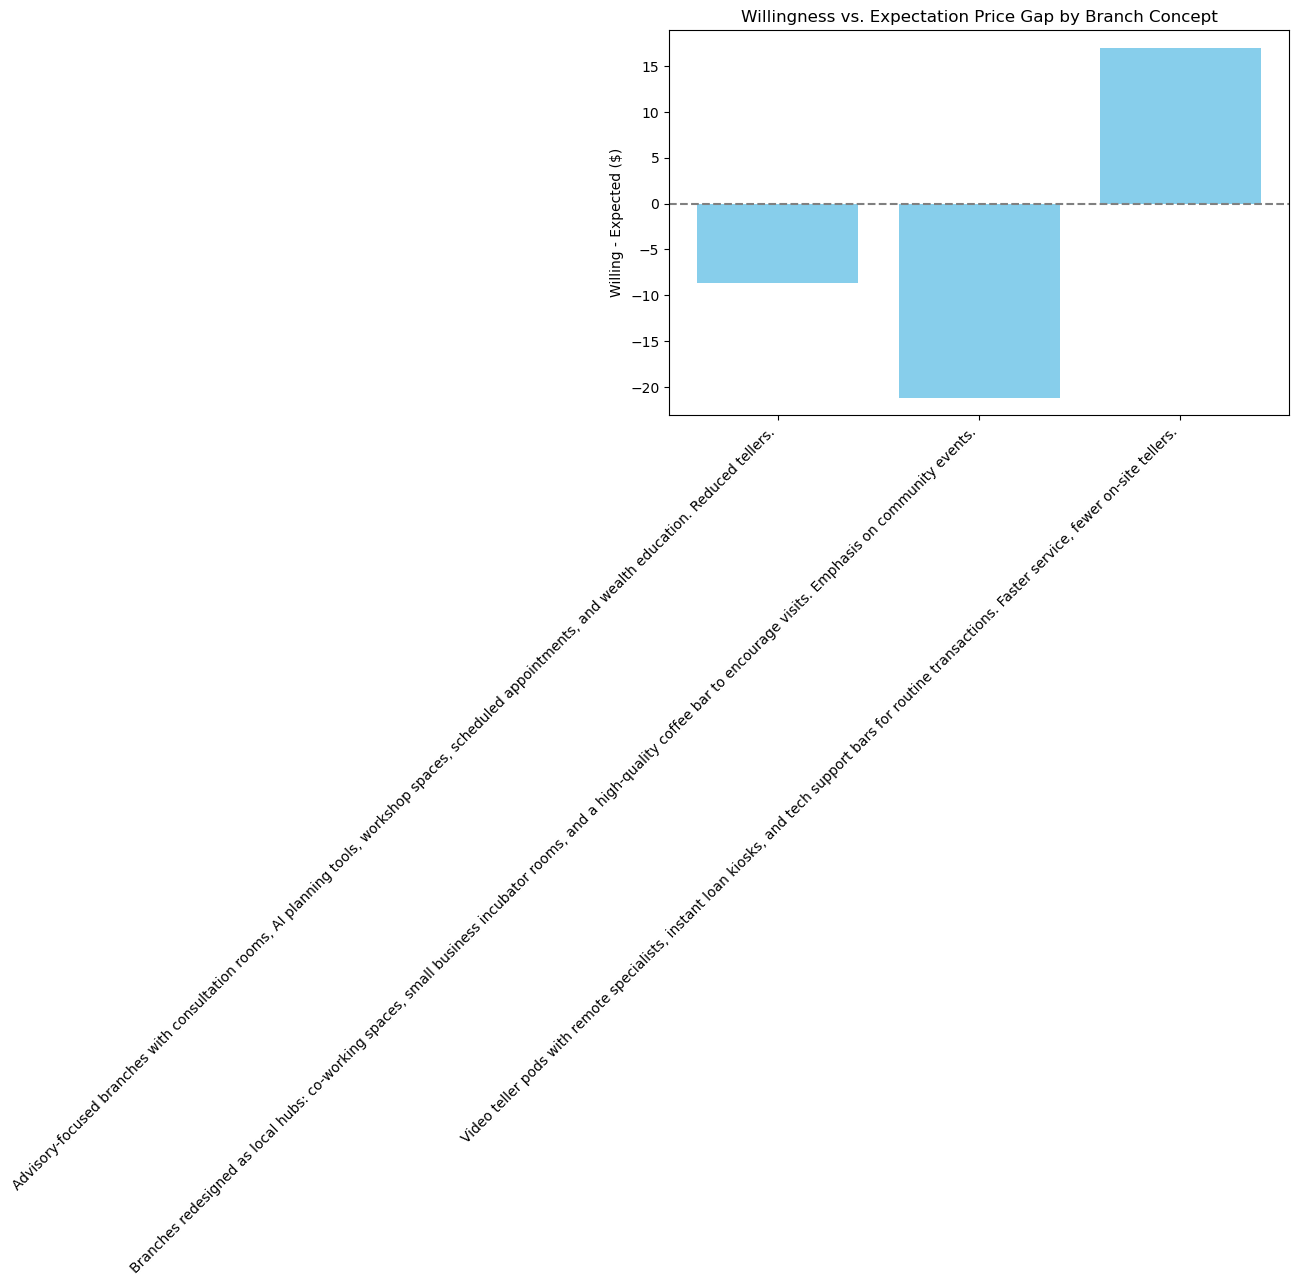

In [220]:
import matplotlib.pyplot as plt

pricing_summary["price_gap"] = pricing_summary["willing_price"] - pricing_summary["expected_price"]

plt.figure(figsize=(8,5))
plt.bar(pricing_summary["concept"], pricing_summary["price_gap"], color="skyblue")
plt.axhline(0, color="gray", linestyle="--")
plt.title("Willingness vs. Expectation Price Gap by Branch Concept")
plt.ylabel("Willing - Expected ($)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

In [223]:
import re

# Step 3 – Function to extract a number (e.g., 1 to 5 or 1 to 10) from free-text
def extract_intent(text):
    if isinstance(text, str):
        match = re.search(r"\d+", text)
        return int(match.group()) if match else None
    return None

# Step 4 – Apply to extract number
df_try["intent_score"] = df_try["answer.intent_to_try"].apply(extract_intent)

# ✅ Step 5 – Cap values between 1 and 10
df_try["intent_score"] = df_try["intent_score"].clip(lower=1, upper=10)

# Step 6 – Group and average
intent_summary = df_try.groupby("concept")[["intent_score"]].mean().reset_index()

# Step 7 – Display summary
display(intent_summary)

,concept,intent_score
0,Advisory-focused branches with consultation ro...,7.600000
1,Branches redesigned as local hubs: co-working ...,7.800000
2,"Video teller pods with remote specialists, ins...",8.166667


In [224]:


import re

# Step 1 – Extract values using the same regex logic
def extract_number(text):
    if isinstance(text, str):
        match = re.search(r"\d+(?:\.\d+)?", text)  # supports decimals
        return float(match.group()) if match else None
    return None

# Step 2 – Select and clean fields
df_value = results_pricing.select(
    "scenario.description",
    "answer.price_expectation",
    "answer.price_willingness",
    "agent.agent_name",
    "agent.persona"
).to_pandas()

# Step 3 – Rename scenario
df_value = df_value.rename(columns={"scenario.description": "concept"})

# Step 4 – Apply extraction
df_value["expected_price"] = df_value["answer.price_expectation"].apply(extract_number)
df_value["willing_price"] = df_value["answer.price_willingness"].apply(extract_number)

# Step 5 – Calculate Value Score (handle division-by-zero cases)
df_value["value_score"] = df_value.apply(
    lambda row: row["willing_price"] / row["expected_price"] if row["expected_price"] and row["expected_price"] > 0 else None,
    axis=1
)

# Step 6 – Group and average
value_summary = df_value.groupby("concept")["value_score"].mean().reset_index()

# Step 7 – Display results
display(value_summary)

,concept,value_score
0,Advisory-focused branches with consultation ro...,0.660
1,Branches redesigned as local hubs: co-working ...,0.625
2,"Video teller pods with remote specialists, ins...",2.450


In [231]:
# Use trust score as proxy for perceived differentiation
df_trust = results_ratings.select(
    "scenario.description",
    "answer.trust"
).to_pandas()

df_trust = df_trust.rename(columns={"scenario.description": "concept"})
df_trust["trust_score"] = pd.to_numeric(df_trust["answer.trust"], errors="coerce")

diff_proxy = df_trust.groupby("concept")["trust_score"].mean().reset_index()
display(diff_proxy)

,concept,trust_score
0,Advisory-focused branches with consultation ro...,7.0
1,Branches redesigned as local hubs: co-working ...,7.0
2,"Video teller pods with remote specialists, ins...",7.0


In [232]:
# Step 1 - Set scenario assumptions
total_customers = 1_000_000  # Total Thunder Bank customer base
high_value_pct = 0.20        # Top 20% high-value segment
profit_contribution = 0.60   # They contribute 60% of total profits
interest_rate = 0.80         # 80% of them show strong interest
monthly_price = 100          # $100/month service

# Step 2 - Calculate revenue potential
high_value_customers = total_customers * high_value_pct
interested_customers = high_value_customers * interest_rate
annual_revenue = interested_customers * monthly_price * 12

# Step 3 - Print result
print(f"Estimated annual revenue from high-value segment: ${annual_revenue:,.0f}")

Estimated annual revenue from high-value segment: $192,000,000
